<a href="https://colab.research.google.com/github/NadeefChowdhury/Tensorflow_3_BinaryClassification/blob/main/Tensorflow_3_EarlyStopping_And_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32', 'B', 'M'],
      dtype='object')

In [5]:
df2 = pd.get_dummies(df['diagnosis'])
df = pd.concat([df,df2], axis=1).reindex(df.index)

In [11]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',]].values
y = df['M'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense, Dropout

In [61]:
X_train.shape, X_test.shape

((381, 30), (188, 30))

In [28]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
12/12 [==============================] - 1s 24ms/step - loss: 0.7055 - val_loss: 0.6841
Epoch 2/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6683 - val_loss: 0.6477
Epoch 3/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6295 - val_loss: 0.6106
Epoch 4/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5924 - val_loss: 0.5702
Epoch 5/600
12/12 [==============================] - 0s 6ms/step - loss: 0.5545 - val_loss: 0.5277
Epoch 6/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5115 - val_loss: 0.4869
Epoch 7/600
12/12 [==============================] - 0s 6ms/step - loss: 0.4673 - val_loss: 0.4381
Epoch 8/600
12/12 [==============================] - 0s 5ms/step - loss: 0.4203 - val_loss: 0.3962
Epoch 9/600
12/12 [==============================] - 0s 5ms/step - loss: 0.3786 - val_loss: 0.3556
Epoch 10/600
12/12 [==============================] - 0s 6ms/step - loss: 0.3392 - val_loss: 0.3193
Epoch 11

<Axes: >

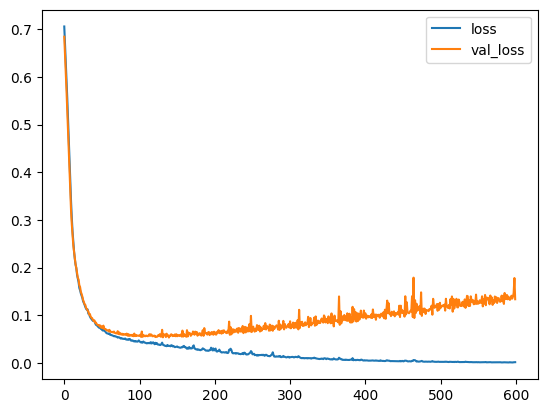

In [30]:
pd.DataFrame(model.history.history).plot()

In [34]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
12/12 [==============================] - 4s 88ms/step - loss: 0.7041 - val_loss: 0.6918
Epoch 2/600
12/12 [==============================] - 0s 24ms/step - loss: 0.6865 - val_loss: 0.6787
Epoch 3/600
12/12 [==============================] - 0s 17ms/step - loss: 0.6710 - val_loss: 0.6653
Epoch 4/600
12/12 [==============================] - 0s 25ms/step - loss: 0.6544 - val_loss: 0.6438
Epoch 5/600
12/12 [==============================] - 0s 16ms/step - loss: 0.6267 - val_loss: 0.6038
Epoch 6/600
12/12 [==============================] - 0s 8ms/step - loss: 0.5881 - val_loss: 0.5642
Epoch 7/600
12/12 [==============================] - 0s 8ms/step - loss: 0.5465 - val_loss: 0.5219
Epoch 8/600
12/12 [==============================] - 0s 10ms/step - loss: 0.5026 - val_loss: 0.4759
Epoch 9/600
12/12 [==============================] - 0s 9ms/step - loss: 0.4570 - val_loss: 0.4300
Epoch 10/600
12/12 [==============================] - 0s 6ms/step - loss: 0.4116 - val_loss: 0.3888
Epo

<Axes: >

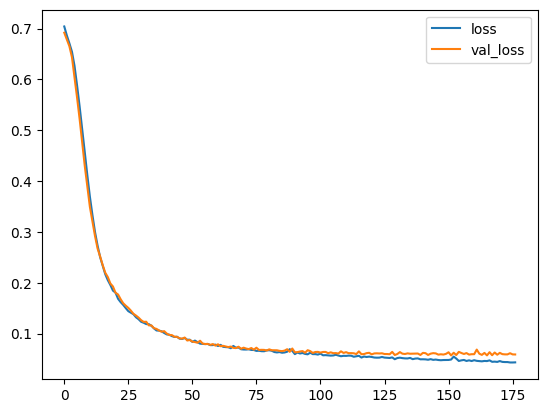

In [36]:
pd.DataFrame(model.history.history).plot()

In [63]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [64]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
12/12 [==============================] - 1s 19ms/step - loss: 0.7444 - val_loss: 0.6930
Epoch 2/600
12/12 [==============================] - 0s 7ms/step - loss: 0.7057 - val_loss: 0.6788
Epoch 3/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6888 - val_loss: 0.6684
Epoch 4/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6728 - val_loss: 0.6568
Epoch 5/600
12/12 [==============================] - 0s 7ms/step - loss: 0.6719 - val_loss: 0.6453
Epoch 6/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6490 - val_loss: 0.6318
Epoch 7/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6491 - val_loss: 0.6171
Epoch 8/600
12/12 [==============================] - 0s 6ms/step - loss: 0.6270 - val_loss: 0.6006
Epoch 9/600
12/12 [==============================] - 0s 7ms/step - loss: 0.6253 - val_loss: 0.5838
Epoch 10/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6103 - val_loss: 0.5656
Epoch 11

<Axes: >

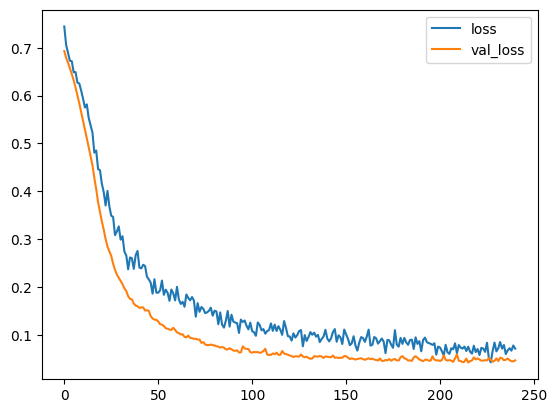

In [65]:
pd.DataFrame(model.history.history).plot()

In [67]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

6/6 [==============================] - 0s 4ms/step


In [70]:
predictions


array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       121
           1       0.97      0.99      0.98        67

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

[[119   2]
 [  1  66]]
